### TensorFlow & Keras based NN Training

In [34]:
import numpy
import pandas
import glob
import logging
from collections import OrderedDict as od
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [35]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [36]:
data=od()
for filename in glob.glob('../Data/Features/*'):
    key=filename.split('/')[-1].split('_')[0]
    print(key)
    data[key]=pandas.read_csv(filename).reset_index().dropna()

201711092033
201711091951
201711182141
201711161638


In [37]:
def splitX_Y(df):
    X=df[[u'lastAccelerometerValues[0]_mean',
           u'lastAccelerometerValues[1]_mean', u'lastAccelerometerValues[2]_mean',
           u'lastAccelerometerValues[0]_var', u'lastAccelerometerValues[1]_var',
           u'lastAccelerometerValues[2]_var', u'lastAccelerometerValues[0]_skew',
           u'lastAccelerometerValues[1]_skew', u'lastAccelerometerValues[2]_skew',
           u'lastAccelerometerValues[0]_kurtosis',
           u'lastAccelerometerValues[1]_kurtosis',
           u'lastAccelerometerValues[2]_kurtosis', u'lastGyroscopeValues[0]_mean',
           u'lastGyroscopeValues[1]_mean', u'lastGyroscopeValues[2]_mean',
           u'lastGyroscopeValues[0]_var', u'lastGyroscopeValues[1]_var',
           u'lastGyroscopeValues[2]_var', u'lastGyroscopeValues[0]_skew',
           u'lastGyroscopeValues[1]_skew', u'lastGyroscopeValues[2]_skew',
           u'lastGyroscopeValues[0]_kurtosis', u'lastGyroscopeValues[1]_kurtosis',
           u'lastGyroscopeValues[2]_kurtosis', u'lastMagnetometerValues[0]_mean',
           u'lastMagnetometerValues[1]_mean', u'lastMagnetometerValues[2]_mean',
           u'lastMagnetometerValues[0]_var', u'lastMagnetometerValues[1]_var',
           u'lastMagnetometerValues[2]_var', u'lastMagnetometerValues[0]_skew',
           u'lastMagnetometerValues[1]_skew', u'lastMagnetometerValues[2]_skew',
           u'lastMagnetometerValues[0]_kurtosis',
           u'lastMagnetometerValues[1]_kurtosis',
           u'lastMagnetometerValues[2]_kurtosis']]
    Y=df[['target']]
    return X, Y

In [38]:
X=pandas.DataFrame()
Y=pandas.DataFrame()
for key in data.keys():
    x,y=splitX_Y(data[key])
    X=X.append(x)
    Y=Y.append(y)
X=X.reset_index().drop(['index'],axis=1)
Y=Y.reset_index().drop(['index'],axis=1)

In [120]:
Y0=Y.applymap(lambda x:0 if x<72 else 1)

In [121]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y0)
encoded_Y = encoder.transform(Y0)

In [122]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

36 inputs -> [40 hidden nodes] -> 144 outputs

In [127]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(40, input_dim=36, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [128]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [129]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [ ]:
results = cross_val_score(estimator, X.values, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [64]:
import pydotplus

In [74]:
import theano.d3viz as d3v
d3v.d3viz(estimator.get_output(), 'test.html')

AttributeError: 'KerasClassifier' object has no attribute 'get_output'

In [79]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy
 
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(40, input_dim=36, activation='relu'))
	model.add(Dense(8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)
# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

IndexError: too many indices for array

In [93]:
# Compute the correlation matrix
corr = x.corr()

# Generate a mask for the upper triangle
mask = numpy.zeros_like(corr, dtype=numpy.bool)
mask[numpy.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

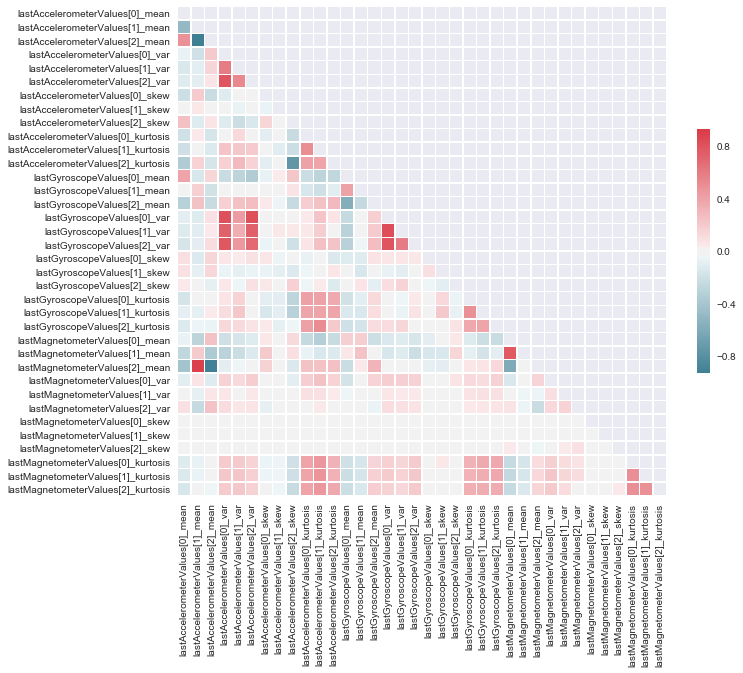

In [92]:
plt.show()

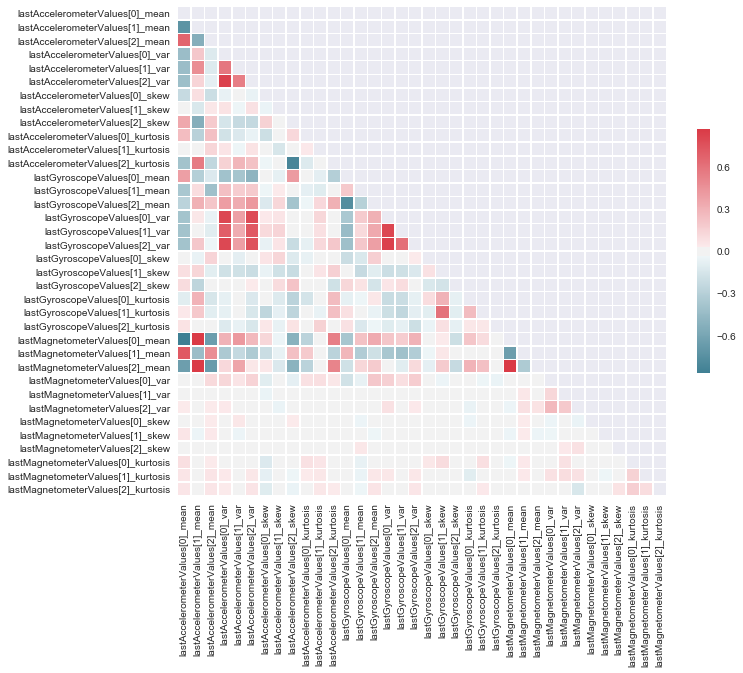

In [94]:
plt.show()